(51290, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    512

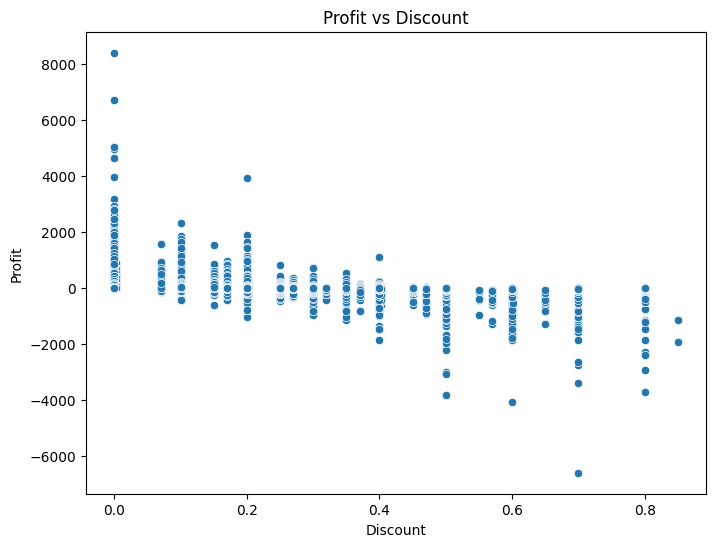

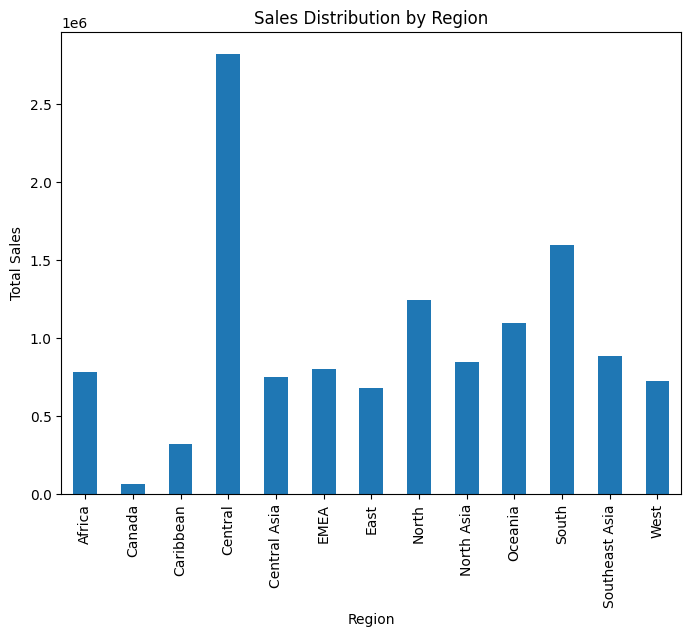

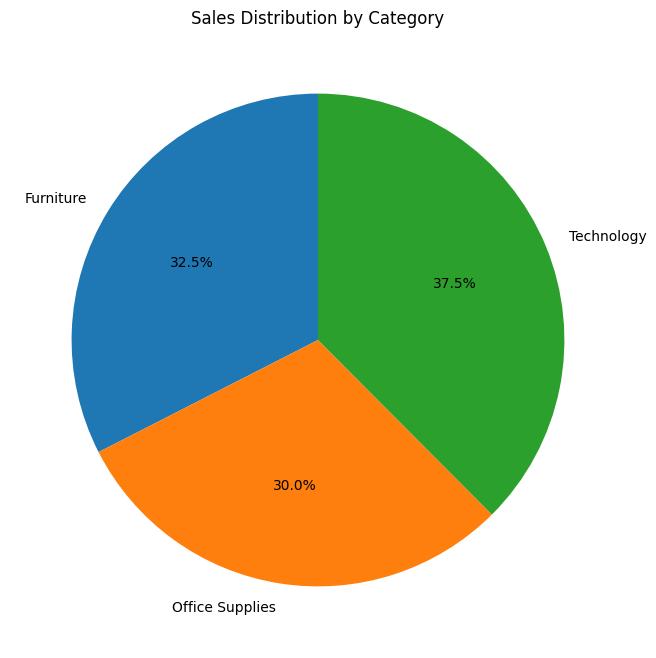

Mean Squared Error: 187787.80150462047
Coefficients: [  1.48311109 189.26580607]
Intercept: 176.0213437046341


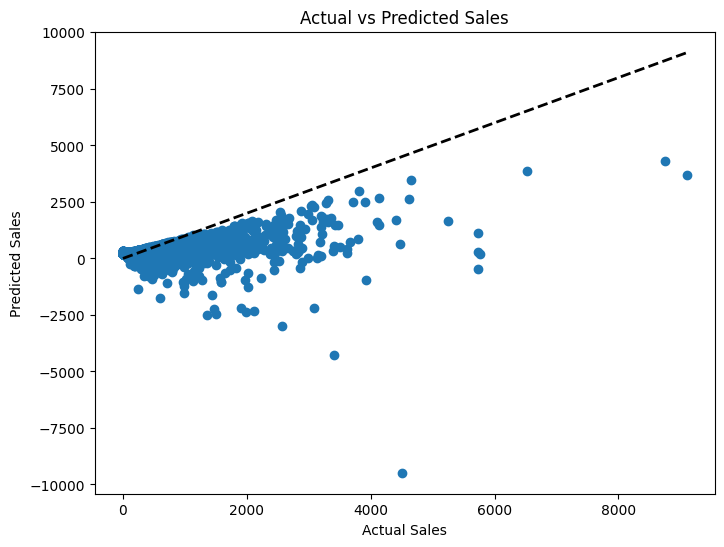

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load and Explore the Dataset
# Load the dataset
file_path = r"C:\Users\dell\Downloads\archive (3)\sales_data.csv.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')  # You can also try 'ISO-8859-1' or 'cp1252'
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

# Proceed only if the dataset is loaded successfully
if df is not None:
    # Inspect the dataset
    print(df.shape)  # Check the dimensions of the dataset
    print(df.info())  # Check data types and missing values
    print(df.describe())  # Get summary statistics
    print(df.head())  # View first few rows of the dataset

    # Print column names to check for 'Sales'
    print("Column names:", df.columns)

    # Step 2: Data Cleaning
    # Remove duplicate rows
    df = df.drop_duplicates()

    # Handle missing values by filling them with the mean or median
    if 'Sales' in df.columns:
        df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
    else:
        print("Column 'Sales' not found in the dataset.")

    if 'Profit' in df.columns:
        df['Profit'] = df['Profit'].fillna(df['Profit'].median())
    else:
        print("Column 'Profit' not found in the dataset.")

    if 'Discount' in df.columns:
        df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
    else:
        print("Column 'Discount' not found in the dataset.")

    if 'Category' in df.columns:
        df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
    else:
        print("Column 'Category' not found in the dataset.")

    if 'Region' in df.columns:
        df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
    else:
        print("Column 'Region' not found in the dataset.")

    # Convert the 'Date' column to datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    else:
        print("Column 'Date' not found in the dataset.")

    # Step 3: Exploratory Data Analysis (EDA)
    if 'Sales' in df.columns and 'Date' in df.columns:
        # Plot time series graph for Sales over time
        plt.figure(figsize=(10,6))
        df.groupby('Date')['Sales'].sum().plot()
        plt.title('Sales over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.show()

    if 'Profit' in df.columns and 'Discount' in df.columns:
        # Scatter plot between Profit and Discount
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Discount', y='Profit')
        plt.title('Profit vs Discount')
        plt.xlabel('Discount')
        plt.ylabel('Profit')
        plt.show()

    if 'Region' in df.columns and 'Sales' in df.columns:
        # Visualize sales distribution by Region using a bar plot
        plt.figure(figsize=(8,6))
        df.groupby('Region')['Sales'].sum().plot(kind='bar')
        plt.title('Sales Distribution by Region')
        plt.xlabel('Region')
        plt.ylabel('Total Sales')
        plt.show()

    if 'Category' in df.columns and 'Sales' in df.columns:
        # Visualize sales distribution by Category using a pie chart
        category_sales = df.groupby('Category')['Sales'].sum()
        plt.figure(figsize=(8,8))
        category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title('Sales Distribution by Category')
        plt.ylabel('')
        plt.show()

    # Step 4: Predictive Modeling
    if 'Sales' in df.columns and 'Profit' in df.columns and 'Discount' in df.columns:
        # Select features and target
        X = df[['Profit', 'Discount']]  # Features
        y = df['Sales']  # Target

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model using Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')

        # Optional: Display the coefficients and intercept
        print(f'Coefficients: {model.coef_}')
        print(f'Intercept: {model.intercept_}')

        # Optional: Visualize the model's predictions vs actual values
        plt.figure(figsize=(8,6))
        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title('Actual vs Predicted Sales')
        plt.xlabel('Actual Sales')
        plt.ylabel('Predicted Sales')
        plt.show()
    else:
        print("Required columns for predictive modeling not found in the dataset.")
